In [2]:
import diags
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from datetime import datetime
import os
from diags import hofx

/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_columns', None)

Example JEDI file on Jet

Reference time is the DA analysis time, it must be passed because it is not in the file name like GSI, maybe it is in the file somewhere but I didn't know where

In [4]:
jedi_hofx_filename = "/lfs5/BMC/wrfruc/gge/RDASApp/expr/hofx/hofx_adpsfc.nc"

reference_time = "2023061012"

## Load JEDI data
JEDI data can be filtered by qc flag as it is being read in, it can still be filtered afters like GSI. See https://github.com/JCSDA/ufo/blob/54b44b22291a90955c3eb5327ed24ea9e858d4f6/src/ufo/filters/QCflags.h for list of QC flags

Simple change 'uv' to t, ps, or q to get other variable

In [5]:
hofx_obj = hofx(jedi_hofx_filename, 'uv', ref_time=reference_time, flag=0)

Retrieve df

In [6]:
jedi_df = hofx_obj.df

List all unique obs IDs and station IDs

In [7]:
hofx_obj.obs_ids

array([287])

In [8]:
hofx_obj.stn_ids

array(['KUVA', 'K11R', 'KDZB', ..., 'KMFI', 'KPDX', 'K04W'], dtype=object)

Print metadata

In [9]:
hofx_obj.metadata

{'Variable': 'uv',
 'Date': datetime.datetime(2023, 6, 10, 12, 0),
 'File Type': 'JEDI H(x) diag file',
 'DA System': 'jedi'}

## Make plots of all obs

------------ Wind Data Assimilation Statistics and Plots ------------


Observation Type: 287

Proportion Assimilated: 1.0



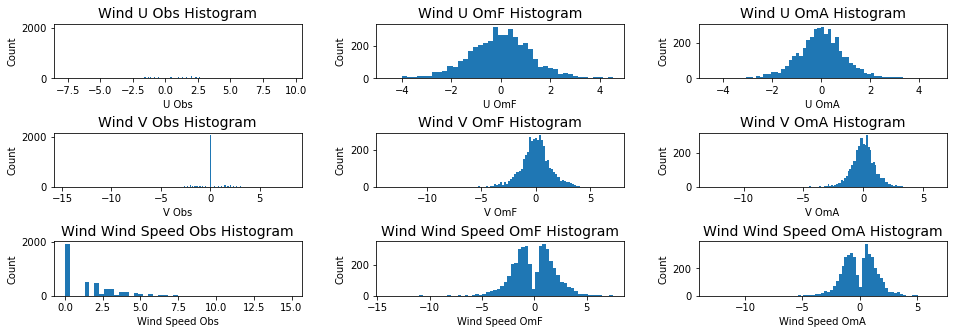

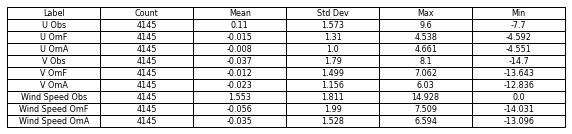

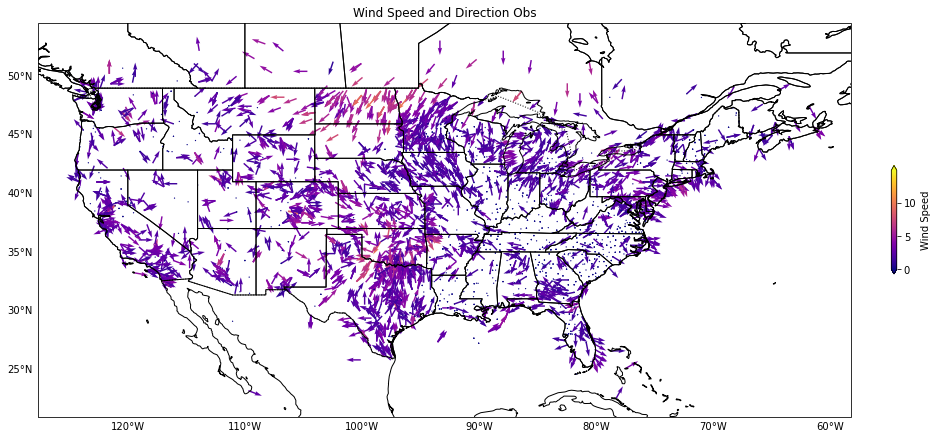

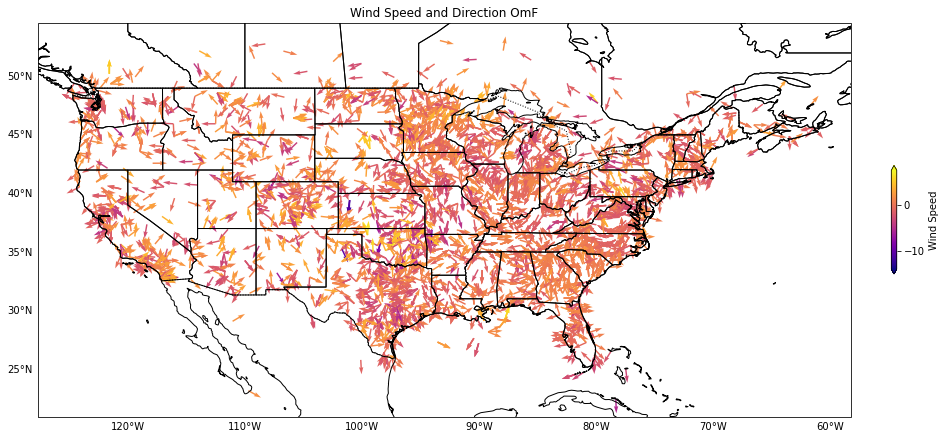

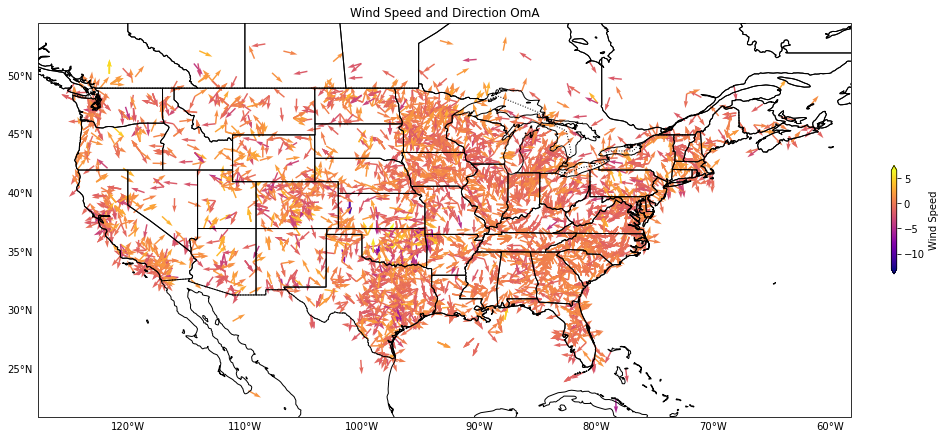

In [10]:
make_wind_base_plots([jedi_df], hofx_obj.metadata)

# Filter df

In [11]:
# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (251, 258) #to convert from deg west to deg east (360 - deg west)

In [12]:
fil_df = filter_df([hofx.df], lat_range=co_lats, lon_range=co_lons)

AttributeError: type object 'hofx' has no attribute 'df'

In [ ]:
fil_df = fil_df[0]

In [ ]:
fil_df

In [ ]:
make_base_plots([fil_df], hofx.metadata)

# Traverse JEDI Hofx file
For understanding the structure and hierarchy of the JEDI NetCDF file

In [3]:
jedi_fp = '/lfs5/BMC/wrfruc/gge/RDASApp/expr/hofx/hofx_adpsfc.nc'

In [61]:
f = Dataset(jedi_fp, mode='r')
# for grp in f.groups:
#      print(f'{grp}')

In [62]:
# print(f.dimensions)

In [81]:
data_dict = {}

for group in f.groups.values():
    print(f'--- {group.name} ---\n')
    for grp in group.variables.values():
        print(grp.name)
#         print(type(grp[:]))
        data = grp[:]
        data_dict[f"{group.name}_{grp.name}"] = data
    print("\n")

df = pd.DataFrame(data_dict)

--- DerivedObsError ---

specificHumidity
surfacePressure
windEastward
windNorthward


--- DerivedObsValue ---

surfacePressure


--- EffectiveError0 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- EffectiveError1 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- EffectiveError2 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- EffectiveQC0 ---

specificHumidity
surfacePressure
airTemperature
windEastward
windNorthward


--- EffectiveQC1 ---

specificHumidity
surfacePressure
airTemperature
windEastward
windNorthward


--- EffectiveQC2 ---

airTemperature
specificHumidity
surfacePressure
windEastward
windNorthward


--- MetaData ---

stationIdentification
prepbufrDataLvlCat
longitude
stationElevation
latitude
prepbufrReportType
seaTemperatureMethod
pressure
dateTime
height
dumpReportType


--- ObsBias0 ---

specificHumidity
surfacePressure
airTemperature
windEastward
windNorthwa